In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from google.colab import drive 
from astropy.modeling import models, fitting
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:

def get_velocity(data_frame_list: "Pandas DataFrames", wavelength_array: "numpy_ndarray"):   
   #should be a list of length six with velocities corresponding to each of the six wavelengths    
  #print(wavelength_array)
  aggregate_velocities = []  
  for i in range(0, len(data_frame_list)):   
    #print(i)  
    velocity_list = [] 
    current_df = data_frame_list[i]
    for j in range(0, len(wavelength_array)):  
      #print(wavelength_array[j])
      vel = (3e8 * (current_df.index - wavelength_array[j]) / wavelength_array[j])/1000  #get velocities associated with each wavelength for a given df
      velocity_list.append(vel)   
    aggregate_velocities.append(velocity_list) 

  return (data_frame_list, aggregate_velocities)
  #aggregate velocities should contain 12 sublists, each with 6 velocity calculations corresponding to the six wavelengths
 

In [10]:

def stack_result():  
  df_list = [] 
  for count in range(1,13):  
      #print(count)
      path_initial = '/content/drive/MyDrive/Third Year at Bates/Galaxies Lab/EBOSS_OUTFLOWS/eBOSS_galaxy_FITS_files/Continuum_Normalized_Stacks/' 
      path_final = path_initial + f"non_agn_mass_grouping_map_group{count}.csv" #figure out mass grouping part of path; 
      #print(f"final path is {path_final}")
      #it has to change
      df = pd.read_csv(path_final).set_index("WAVE")
      #df = pd.read_csv(path_final, header =0, index_col = False) 
      #headers = ["WAVE", "stacked_flux", "continuum_flux", "continuum_normalized_flux"]  
      #df.columns = headers 
      #print(df)
      df_list.append(df) 
  #print(df_list[0]["FLUX"].iloc[550])
  wavelengths = np.array([3727.10,3729.86, 4960.30, 5008.24, 4862.721, 6564.614])  
  #first two are OII, next two are OIII, last two are Halpha and Hbeta, respectively 
  result = get_velocity(df_list, wavelengths) #this contains all twelve dataframes that we are working with   
  return result 

12
12
['Group 10', 'Group 11', 'Group 12', 'Group 7', 'Group 8', 'Group 9', 'Group 4', 'Group 5', 'Group 6', 'Group 1', 'Group 2', 'Group 3']


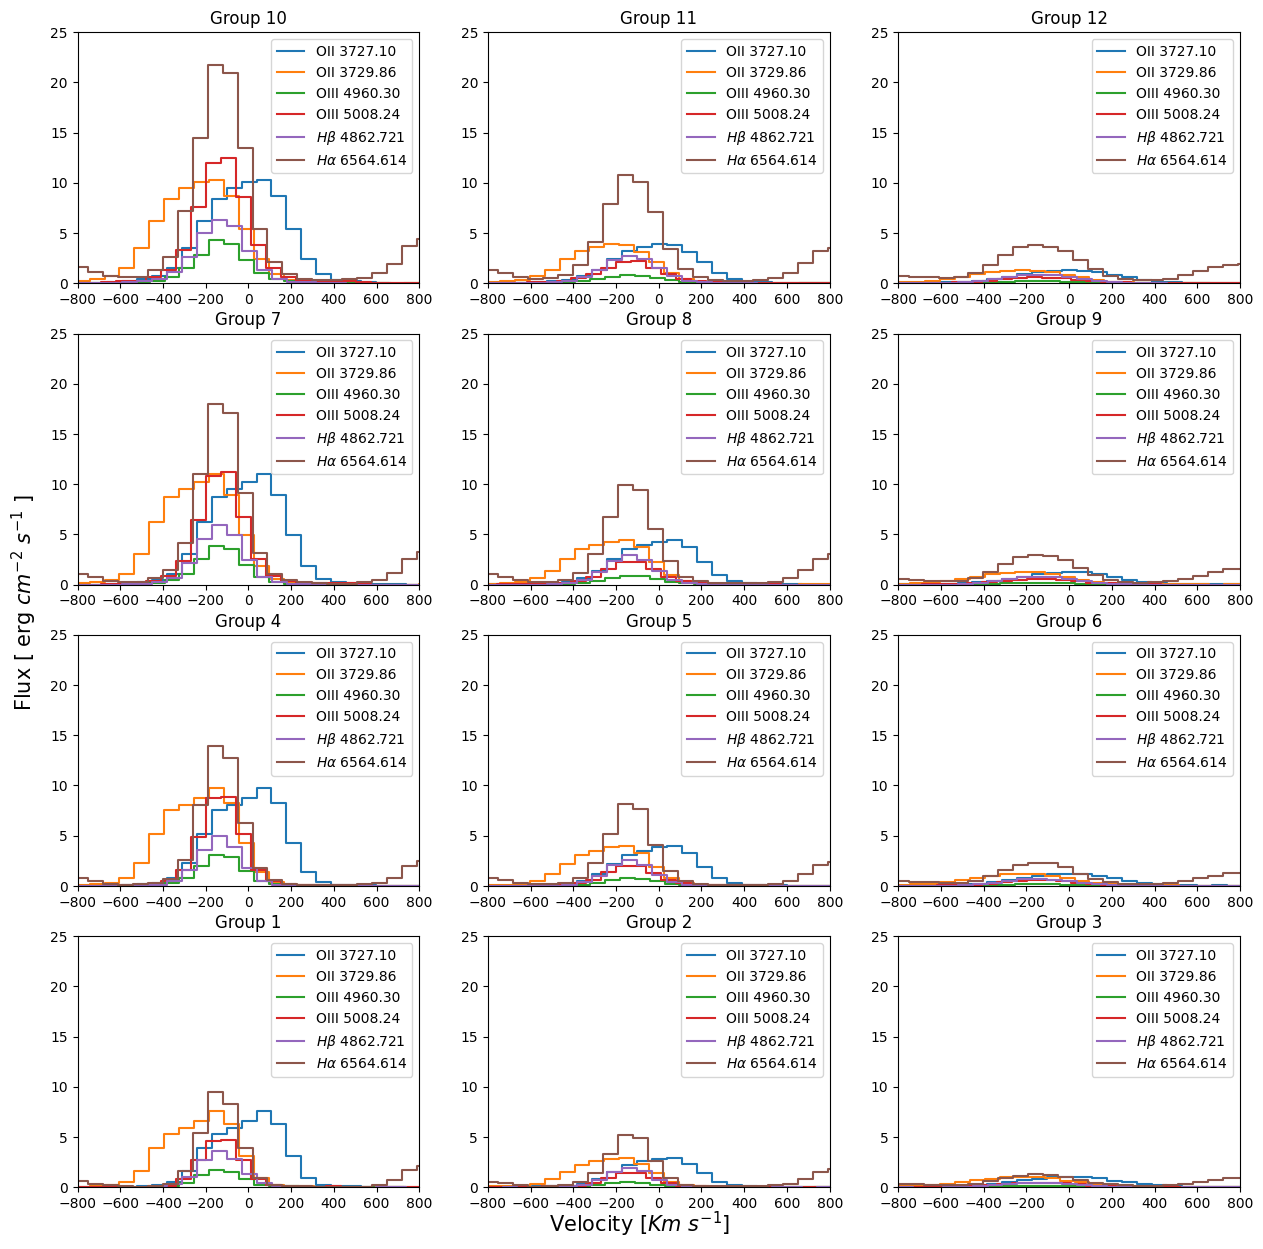

In [11]:

def reverse_a_list(list_object): #goal for order of groups: 10, 11, 12, 7, 8, 9, 4, 5, 6, 1, 2,3 such that ax get plotted in the correct order
  reversed_list = [] 
  for i in range(len(list_object)-1,-1,-1):  #returns 12,11,10,9,8,7,6,5,4,3,2,1
    reversed_list.append(list_object[i])   
  return reversed_list

def reorder_a_list(list_object):

  reversed_list = reverse_a_list(list_object) 
  print(len(reversed_list))

  new_reordered_list = []   
  temp_list = [] 

  for j in range(len(reversed_list)): 
    temp_list.append(reversed_list[j]) 
    if len(reversed_list)/len(temp_list) == 4: #essentially, for each 4 value increment, stop to reoder the list and append the temp list to the full list
      temp_list = reverse_a_list(temp_list) 
      new_reordered_list.append(temp_list) 
      temp_list = []   
  
  final_list = [] #we have to create this new list because right now our list is of the form [[9, 10, 11, 12],[5, 6, 7, 8],[1, 2, 3, 4]] and we need [9,10,11,12,5,6,7,8,1,2,3,4]
  for i in range(len(new_reordered_list)): 
    for j in range(len(new_reordered_list[i])): 
      final_list.append(new_reordered_list[i][j]) 
  
  #print(len(final_list))

  return final_list


def updated_plotter(dfs, velocities): 
  fig, axs = plt.subplots(4, 3, figsize = (15,15))    
  wavelengths = ["OII 3727.10", "OII 3729.86", "OIII 4960.30", "OIII 5008.24", r"$H\beta$ 4862.721", r"$H\alpha$ 6564.614"] #change H-alpha and H-Beta wavelengths 
  title = ["Group 10", "Group 11", "Group 12", "Group 7", "Group 8", "Group 9", "Group 4", "Group 5", "Group 6", "Group 1", "Group 2", "Group 3"] 
  print(title)
  for i in range(len(axs.flat)): #flat turns the 3D array with 4 elements in each subarray into a 1d array  
    ax = axs.flat[i] 
    ax.set_title(title[i])
    for j in range(0, len(velocity_list[i])):
      ax.step(x = velocity_list[i][j], y = dfs[i]["subtracted_gas_flux"])  
      ax.set_xlim(-800,800) 
      ax.set_ylim(0, 25)  
      ax.legend(wavelengths)
 
  fig.text(0.5, 0.08, r"Velocity [$Km$ $s^{-1}$]", ha='center', fontsize = 15)
  fig.text(0.08, 0.5, r'Flux [ erg $cm^{-2}$ $s^{-1}$ ]', va='center', rotation='vertical', fontsize = 15) 

 #next task align the group ordering in the plots that appear below with the group ordering in the plot in Colby's Thesis     
#ax goes from top left to bottom right moving to the right

dataframes, velocity_list = stack_result()      
#print(dataframes[0]) 
#print(dataframes[11]) 
reversed_data_frame_list = reorder_a_list(dataframes)

reversed_velocity_list = reorder_a_list(velocity_list) 
updated_plotter(reversed_data_frame_list, reversed_velocity_list) 

#notes current order is 9,10,11,12,5,6,7,8,1,2,3,4; add plot titles and an overall axis title

##ASSIGNMENT 2: Create Gaussians


In [12]:
from astropy.modeling.functional_models import Gaussian1D
#For each Gaussian we are going to need mean, amplitude, and std dev 
#this means we need to, for each line in a subgroup, obtain the mean flux, 
#flux std. dev, and flux amplitude, then replot 

df_list, vel_list = stack_result() 
#reminder that vel_list will contain 12 sublists; 
#each sublist has a 6 Float64Index's of velocity values 
#this means that we will have 6 Gaussians per sublist 
#for a total of 54 Gaussians

def get_gaussian_params(wave_df: "Pandas.DataFrame", velocity_vals):  
  #return (mean_value, standard_dev, amplitude) 
  std_dev = np.std(velocity_vals) 
  mean_value = np.mean(velocity_vals) 
  amplitude = np.amax(wave_df["subtracted_gas_flux"]) 
  return (std_dev, mean_value, amplitude) 

def get_gaussian_model(velocity_vals: "Float64Index", wave_df: "Pandas.DataFrame", params: tuple, wavelength_params_keys: list):
   '''
   wave = (wave_df.index).to_numpy()
   flux = wave_df["stacked_flux"] 
   plt.plot(wave, flux)
   cont = np.where(flux > params[1], params[1], flux) 
   linfitter = fitting.LinearLSQFitter()
   poly_cont = linfitter(models.Polynomial1D(1), wave, cont) 
   OII_model = models.Gaussian1D(amplitude = params[2], mean = params[1], stddev = params[0])
   '''
   #display(wave_df)
   flux = wave_df["subtracted_gas_flux"]
   model = models.Gaussian1D(amplitude = params[2], mean = params[1], stddev = params[0])
   fitter = fitting.LevMarLSQFitter() 
   fitted_model = fitter(model, velocity_vals, flux)  
   #print(fitted_model(velocity_vals))
   flux_values_model = fitted_model(velocity_vals)   
   #quick_plotter(wave_df["subtracted_gas_flux"], velocity_vals)
   #plt.figure()
   #plt.plot(velocity_vals, wave_df["subtracted_gas_flux"]) 
   #plt.figure()
   #plt.plot(velocity_vals, flux_values_model) 
   return flux_values_model

def truncate_velocity_space(df: "Pandas.Dataframes", velocity_vals: "Float64Index", group_number: int) -> "Float64Index": 
  '''
    Goal of the function is to truncate the velocity space for the given group so that it matches 
    what is in the above plots (similarly)
  '''  
  #print(df)
  velocity_vals_new = np.array(velocity_vals)
  velocity_truncated_list = [] 
  df_truncated_list = []
  #print(group_number)
  if group_number != 7 and group_number != 12:  
    velocity_range = {"minimum": -800, "maximum": 800}  
    for i in range(6): 
      velocity_temp_list = velocity_vals_new[i][velocity_vals_new[i] > velocity_range["minimum"]]  
      #MAY WANT TO TRUNCATE WAVE DATA LATER AND ADD IT TO NEW DFS APPENDED TO df_truncated_list
      arr_temp = df["subtracted_gas_flux"].to_numpy()[velocity_vals_new[i] > velocity_range["minimum"]] #DONT CONVERT WHOLE DF TO NUMPY ARRAY: THIS IS THE ISSUE
      velocity_truncated_list.append(velocity_temp_list[velocity_temp_list < velocity_range["maximum"]]) 
      fully_truncated_array = arr_temp[velocity_temp_list < velocity_range["maximum"]]
      new_dict = {"subtracted_gas_flux": fully_truncated_array} 
      new_df = pd.DataFrame(new_dict) 
      df_truncated_list.append(new_df)

    #print(df_truncated_list[0]) #THIS IS A DF
    #print(velocity_truncated_list[0]) #THIS IS A LIST

  else:  
    velocity_range = {"minimum": -800, "maximum": 800}   
    for i in range(6):
      velocity_temp_list = velocity_vals_new[i][velocity_vals_new[i] > velocity_range["minimum"]]  
      #MAY WANT TO TRUNCATE WAVE DATA LATER AND ADD IT TO NEW DFS APPENDED TO df_truncated_list
      arr_temp = df["subtracted_gas_flux"].to_numpy()[velocity_vals_new[i] > velocity_range["minimum"]] #DONT CONVERT WHOLE DF TO NUMPY ARRAY: THIS IS THE ISSUE
      velocity_truncated_list.append(velocity_temp_list[velocity_temp_list < velocity_range["maximum"]]) 
      fully_truncated_array = arr_temp[velocity_temp_list < velocity_range["maximum"]]
      new_dict = {"subtracted_gas_flux": fully_truncated_array} 
      new_df = pd.DataFrame(new_dict) 
      df_truncated_list.append(new_df)
    
  velocity_truncated_array = np.array(velocity_truncated_list, dtype = "object") 
  #print(type(velocity_truncated_array))
  #print(velocity_truncated_array[0][0])

  return (df_truncated_list, velocity_truncated_array)


  
def quick_plotter(data_frame_list: list, velocities: list):  
  '''
     Goal of this helper function is to quickly plot flux and velocity associated with a set of lines to ensure 
     that a model can be fit to the data 

     data_frame_list: list of data frames containing sublists of length six where each df in a sublist corresponds to a line 
     velocities: list of velocities corresponding to the data frames in the data frame list 
  ''' 

  wavelengths = ["OII 3727.10", "OII 3729.86", "OIII 4960.30", "OIII 5008.24", r"$H\beta$ 4862.721", r"$H\alpha$ 6564.614"]
   
  for i in range(len(data_frame_list)):   
    #print("hi")
    for j in range(6):  
      plt.figure() 
      if j == 0:
        plt.plot(velocities[i][j], data_frame_list[i][j], color = "blue")   
        plt.title(wavelengths[j])
      if j == 1: 
        plt.plot(velocities[i][j], data_frame_list[i][j], color = "orange")   
        plt.title(wavelengths[j])
      if j == 2: 
        plt.plot(velocities[i][j], data_frame_list[i][j], color = "green")  
        plt.title(wavelengths[j])  
      if j == 3: 
        plt.plot(velocities[i][j], data_frame_list[i][j], color = "red")  
        plt.title(wavelengths[j])  
      if j == 4: 
        plt.plot(velocities[i][j], data_frame_list[i][j], color = "purple")   
        plt.title(wavelengths[j])
      if j == 5: 
        plt.plot(velocities[i][j], data_frame_list[i][j], color = "brown")   
        plt.title(wavelengths[j])


def plot_gaussian_mods(data_frame: "Pandas.DataFrame", velocities: list, group_num: int): 
  '''  
  ORIGINAL FUNCTION FOR NON-TRUNCATED DATA FRAMES 

  #takes 1 data frame and one velocity sublist  
  wavelength_params = {"OII_3727.10": None, "OII_3729.86": None, "OIII_4960.30": None, "OIII_5008.24": None, r"$H\beta$_4862.721": None, r"$H\alpha$_6564.614": None}
  wavelength_params_keys = list(wavelength_params.keys()) 
  for j in range(len(velocities)): 
    wavelength_params[wavelength_params_keys[j]]  = get_gaussian_params(data_frame)  
  
  for count, key in enumerate(wavelength_params): 
    #print(count)
    model_for_plotting = get_gaussian_model(velocities[count], data_frame, wavelength_params[key], wavelength_params_keys)
    #plt.figure()
    plt.plot(data_frame.index, data_frame["stacked_flux"], label = "data")  
    plt.plot(data_frame.index, model_for_plotting)    
    
    #plt.plot(velocities[count], data_frame["stacked_flux"], label = "data") 
    #plt.plot(velocities[count], model_for_plotting(data_frame["stacked_flux"]), "r") 
  '''

  ''' 
  NEW VERSION OF THE FUNCTION WHERE WE WORK WITH TRUNCATED DFS 
  ''' 

altered_velocity_list = [] #should end up with a length 12 list where each element is a sublist of len 6
altered_df_list = [] #should end with a length 12 list where each element is a sublist of len 6

wavelength_params = {"OII_3727.10": None, "OII_3729.86": None, "OIII_4960.30": None, "OIII_5008.24": None, r"$H\beta$_4862.721": None, r"$H\alpha$_6564.614": None}
wavelength_params_keys = list(wavelength_params.keys()) 

flux_models_list = [] 

for i in range(len(df_list)): 
  altered_velocity_list.append(truncate_velocity_space(df_list[i], vel_list[i], i)[1])
  altered_df_list.append(truncate_velocity_space(df_list[i], vel_list[i], i)[0]) 

display(altered_df_list[0][0]) 


for i in range(len(df_list)): 
  for j in range(6):
    flux_models_list.append(get_gaussian_model(altered_velocity_list[i][j], altered_df_list[i][j], get_gaussian_params(altered_df_list[i][j], altered_velocity_list[i][j]), wavelength_params_keys[j]))



,subtracted_gas_flux
0,0.049636
1,0.120831
2,0.063893
3,0.054188
4,0.138775
5,0.243401
6,0.515254
7,1.595886
8,3.881072
9,5.323552


72
['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6', 'Group 7', 'Group 8', 'Group 9', 'Group 10', 'Group 11', 'Group 12']


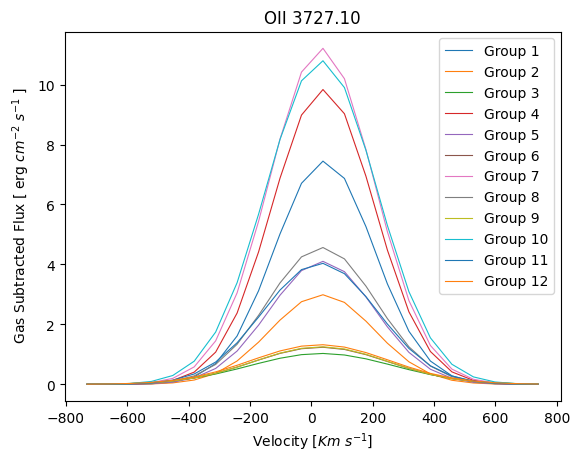

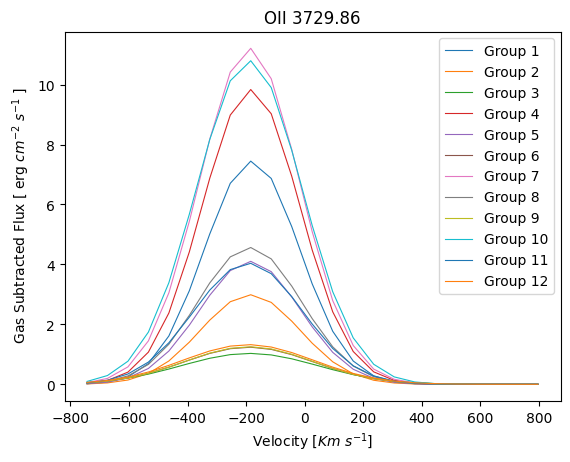

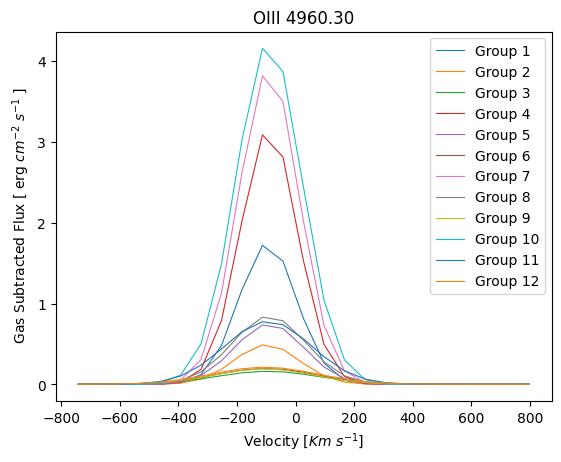

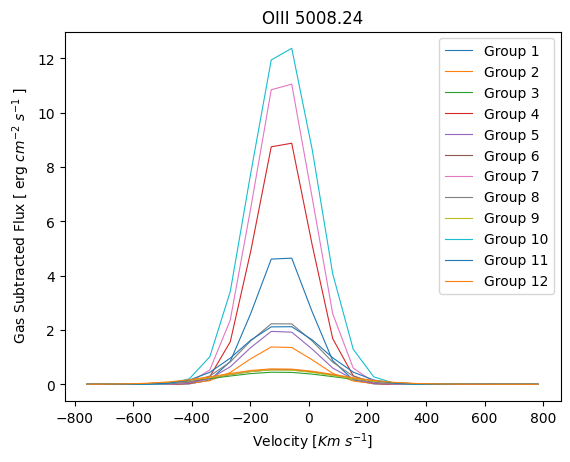

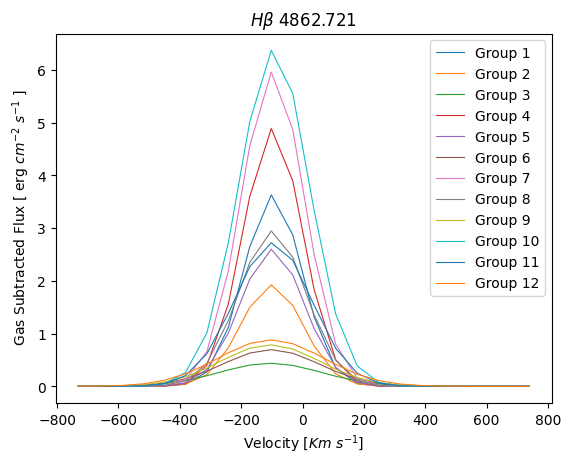

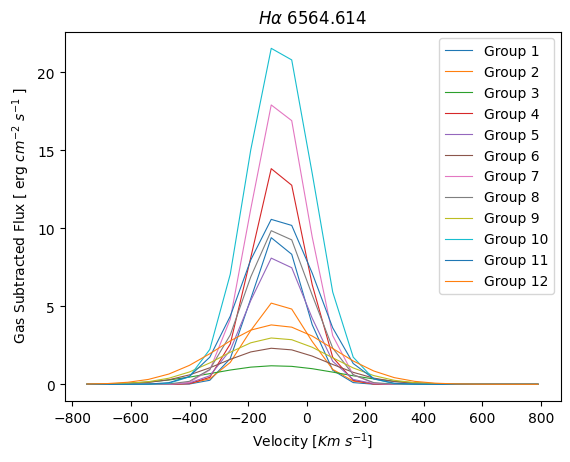

In [13]:
from astropy.coordinates.builtin_frames.lsr import r

#NOW PLOT BY GROUP. 
#EACH PLOT IS A LINE AND THE GAUSSIAN PROFILE FOR THAT LINE 
#print(len(altered_velocity_list))  

#print(flux_models_list[55])

##REORGANIZING Model DATA 
#print(len(flux_models_list))
flattened_velocities = []
for i in range(len(altered_velocity_list)): 
  for j in range(len(altered_velocity_list[i])): 
    flattened_velocities.append(altered_velocity_list[i][j])  

print(len(flattened_velocities)) 

reordered_velocities = []
reordered_model_list = [] 
for j in range(1,7):  
  wavelength_list = [] 
  velocity_list = []
  for i in range(j-1, len(flux_models_list), 6):   
    #print(i) 
    velocity_list.append(flattened_velocities[i])
    wavelength_list.append(flux_models_list[i])  
    #print(len(wavelength_list)) 
  reordered_velocities.append(velocity_list)
  reordered_model_list.append(wavelength_list)
  
  #temp_list = [flux_models_list[i] for i in range(j, len(flux_models_list), 6)]  
  #reordered_model_list.append(temp_list)  

def plot_reordered_models(dfs: list, vels: list):  
  legend_titles = [f"Group {i}" for i in range(1, 13)] 
  print(legend_titles) 
  wavelengths = ["OII 3727.10", "OII 3729.86", "OIII 4960.30", "OIII 5008.24", r"$H\beta$ 4862.721", r"$H\alpha$ 6564.614"]
  for i in range(len(dfs)): 
    plt.figure()  
    for j in range(len(dfs[i])): 
      plt.plot(vels[i][j], dfs[i][j], linewidth = 0.8)  
    plt.legend(legend_titles) 
    plt.title(wavelengths[i])
    plt.xlabel(r"Velocity [$Km$ $s^{-1}$]")
    plt.ylabel(r' Gas Subtracted Flux [ erg $cm^{-2}$ $s^{-1}$ ]') 
  
plot_reordered_models(reordered_model_list, reordered_velocities)

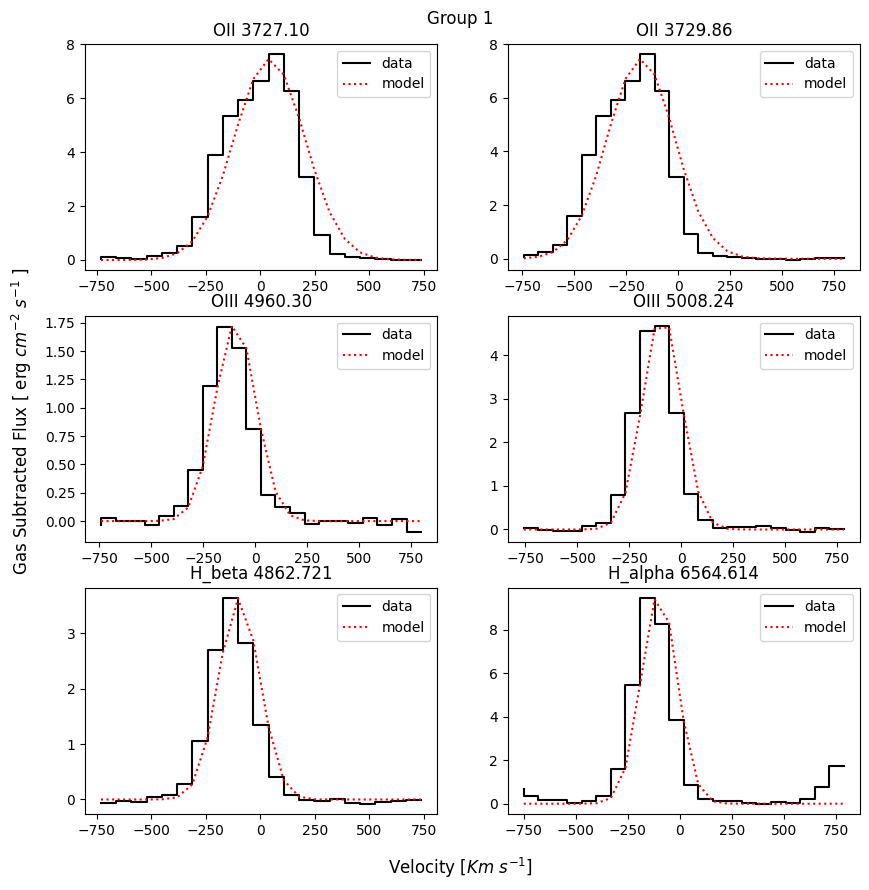

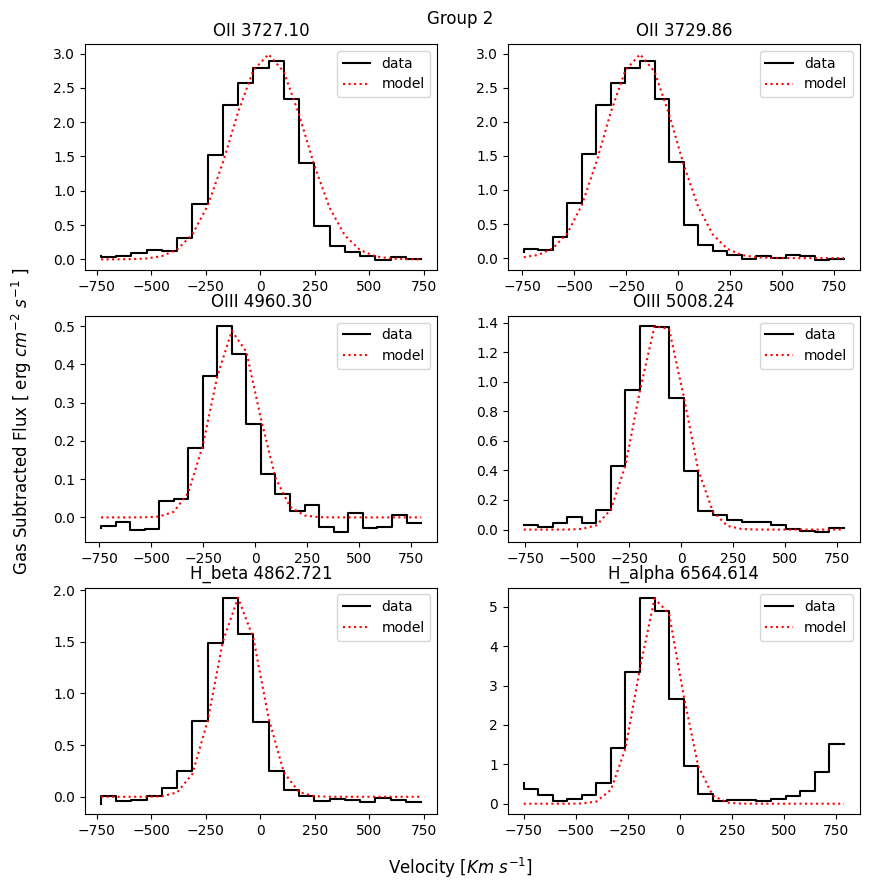

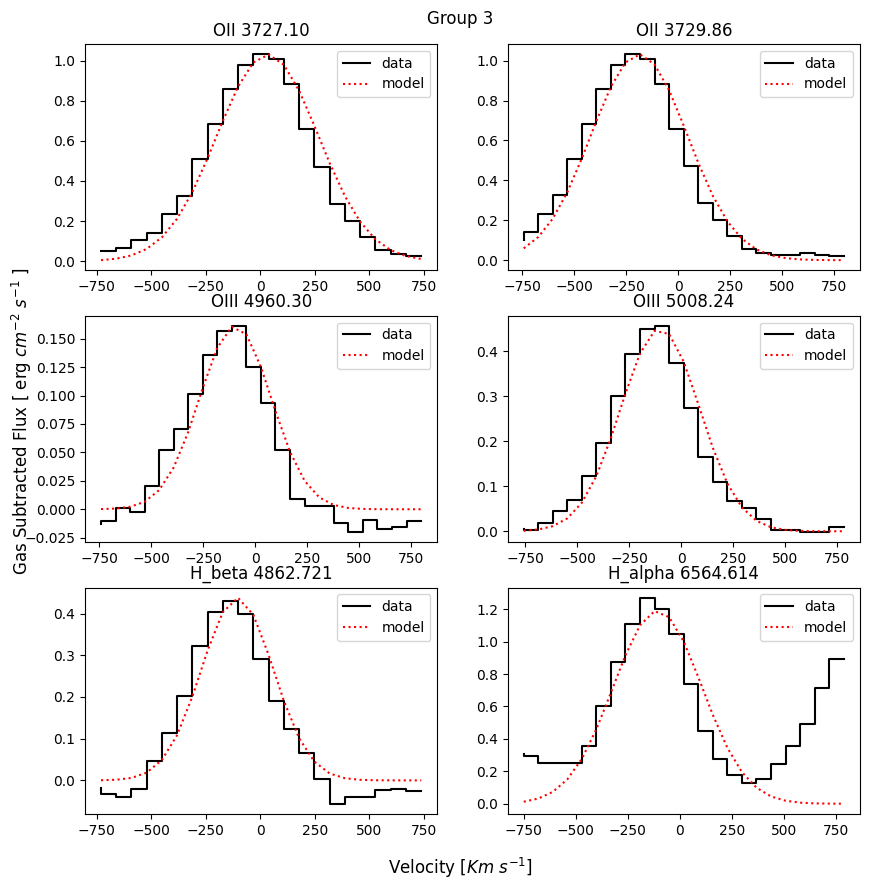

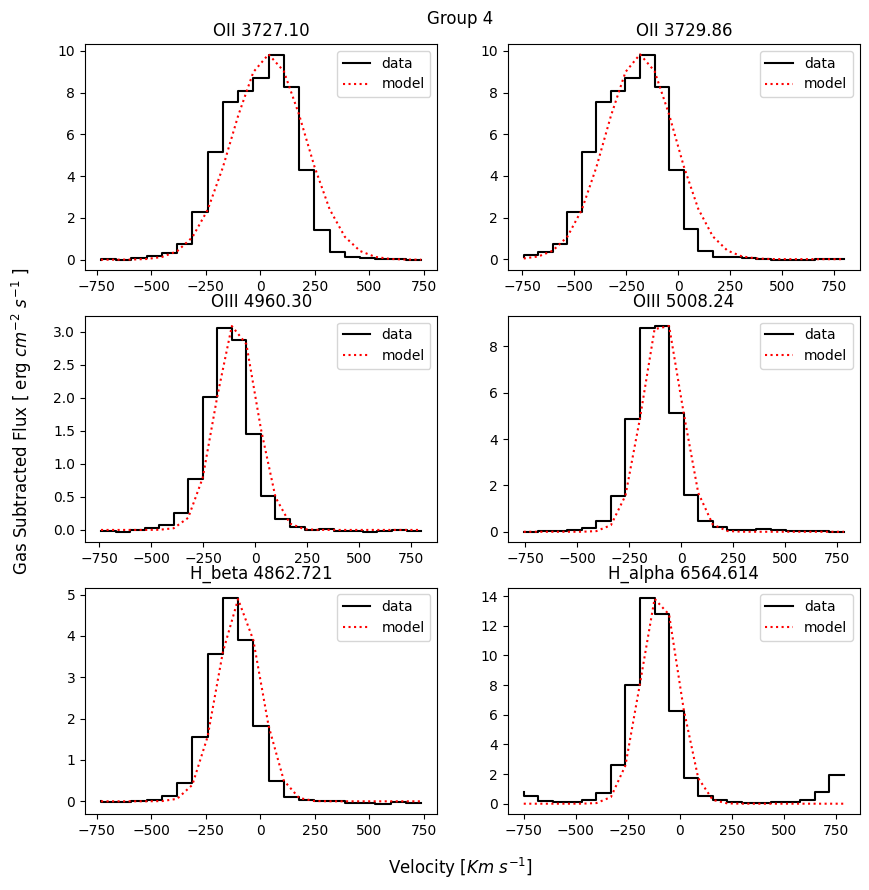

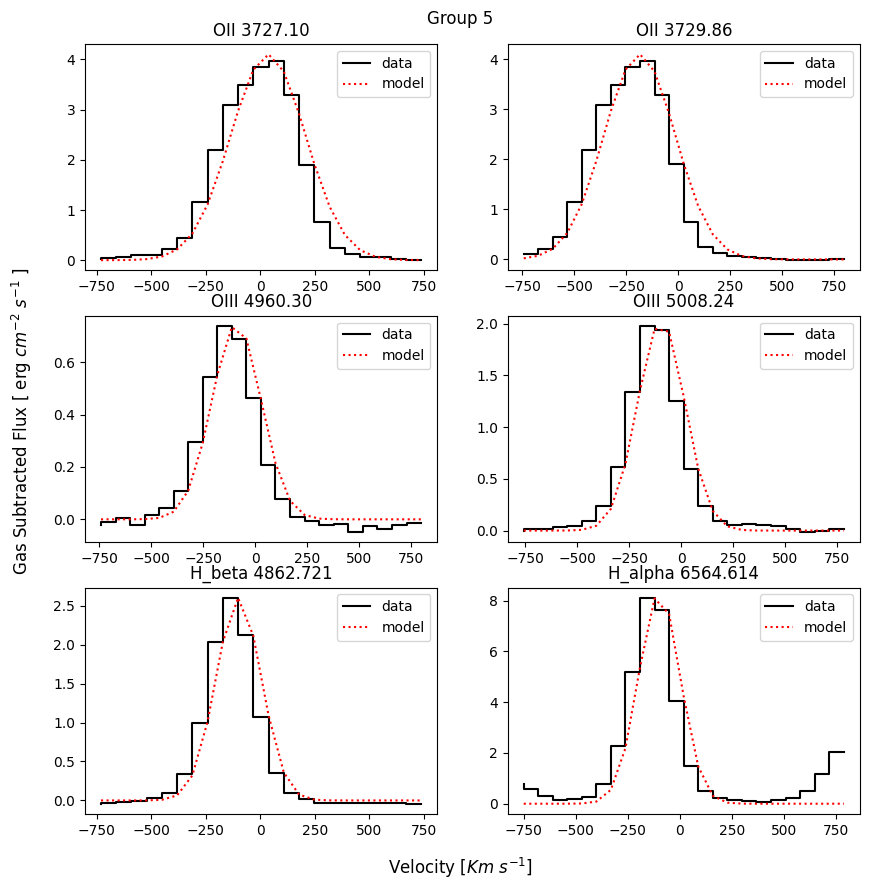

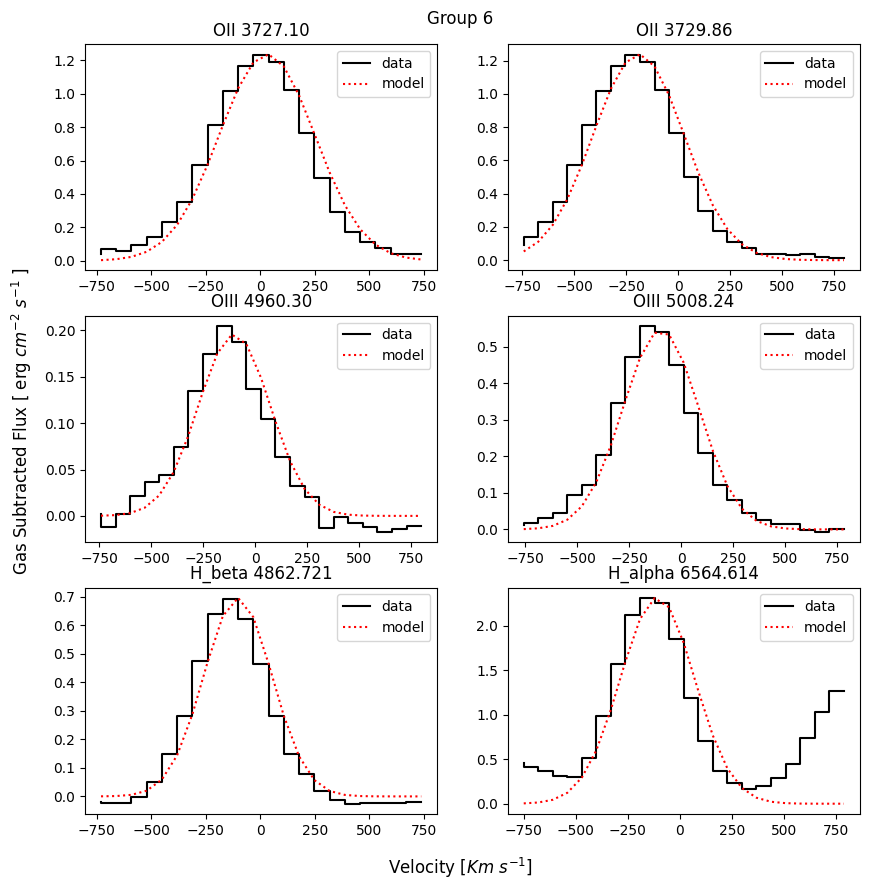

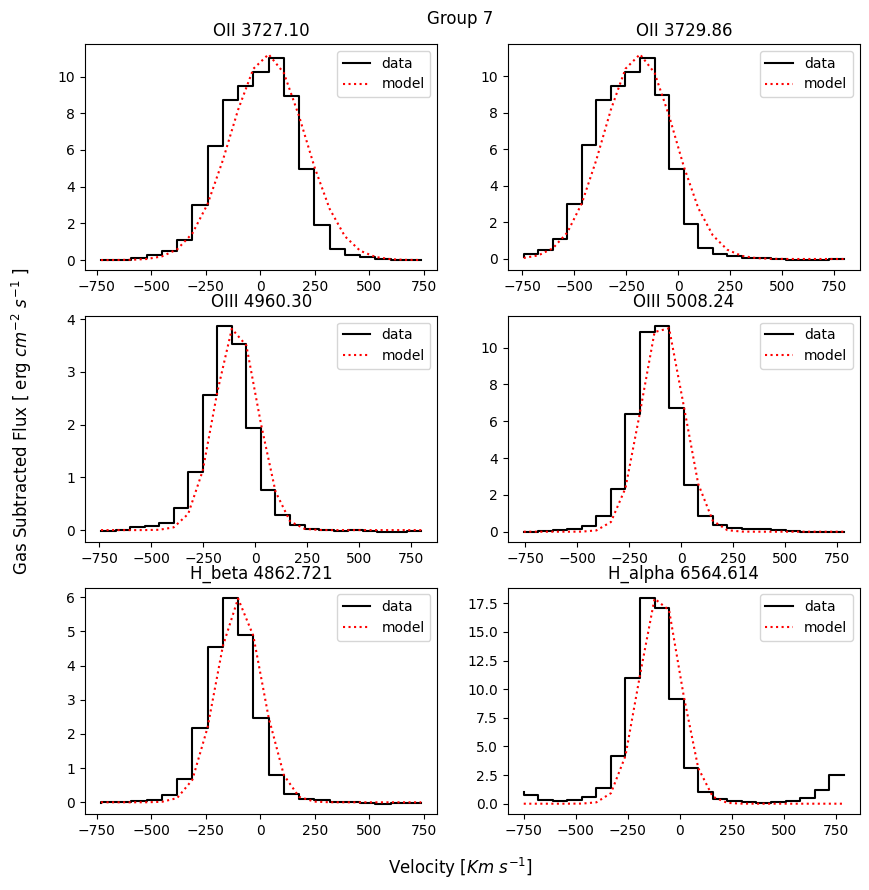

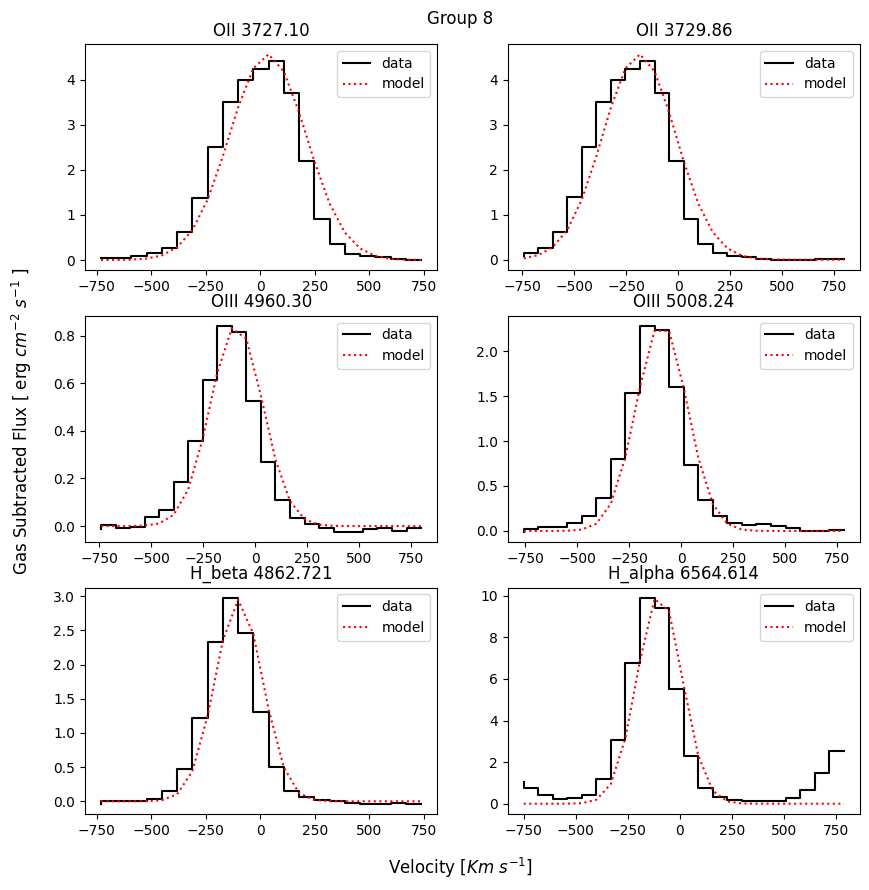

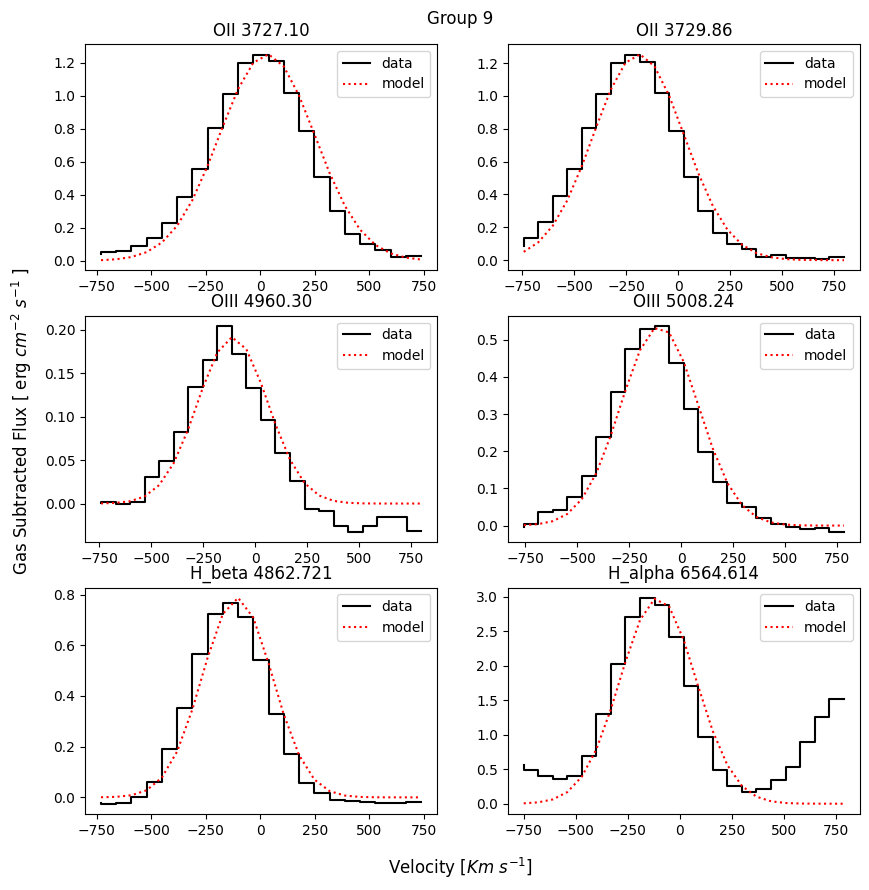

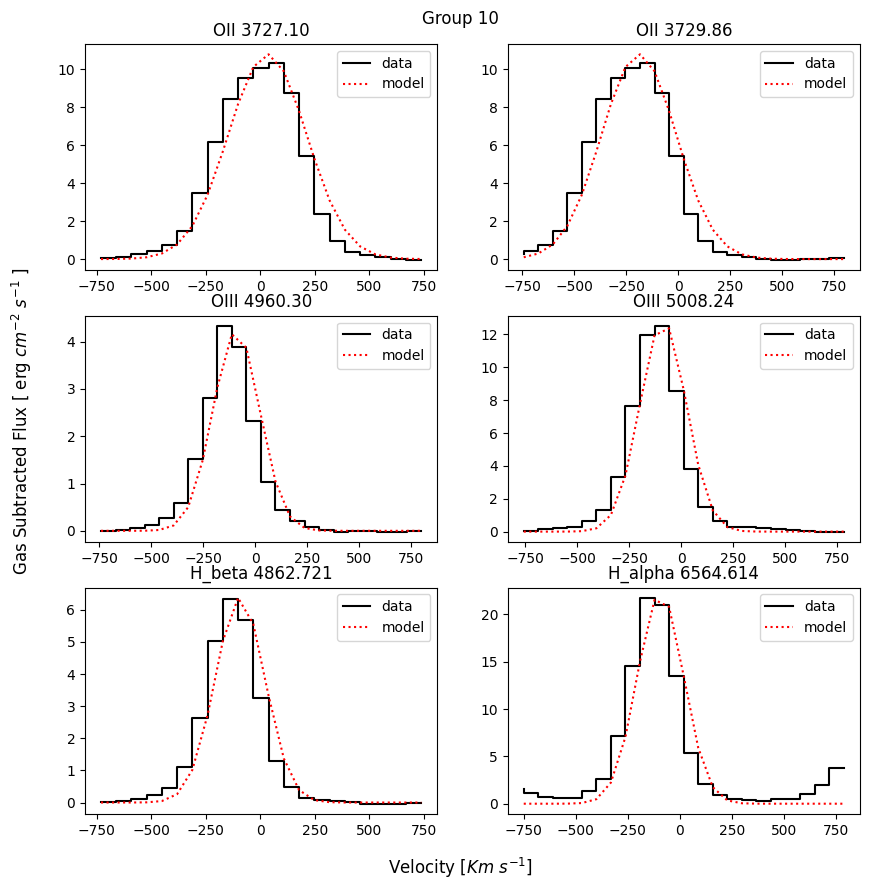

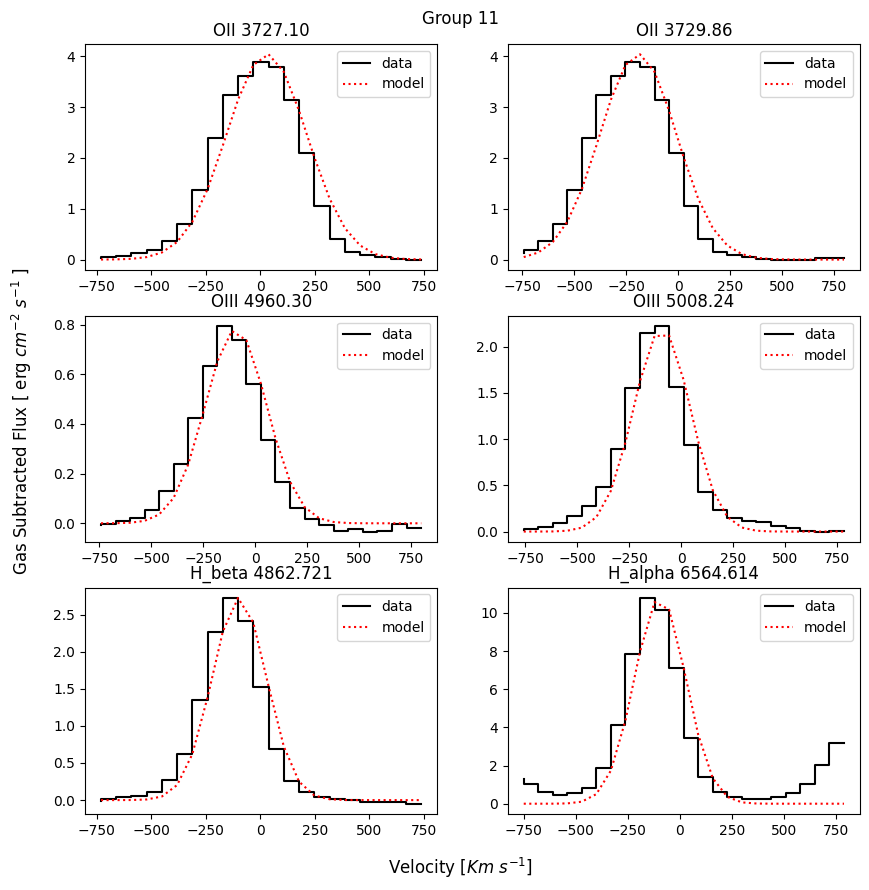

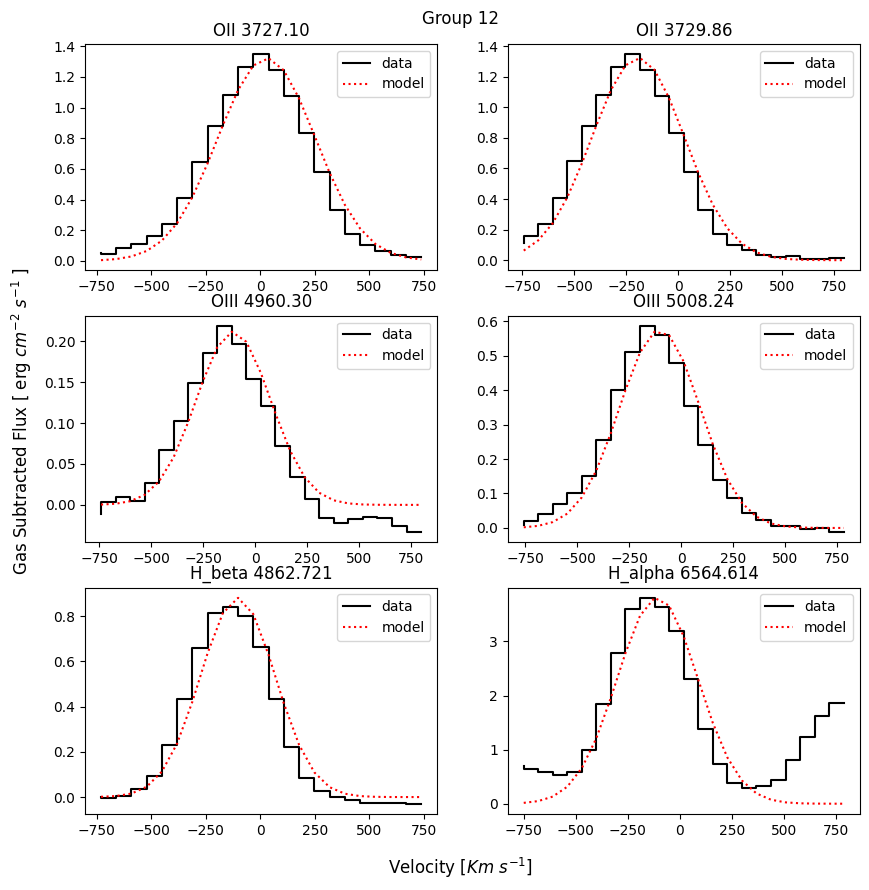

In [112]:
'''
Notes 

plot data for group 1 and the model (six subplots with a line and the data )
show difference between data and Gaussian model 

air and vaccuum wavelengths have different velocities 
Km/s offset could be systemic offset

step 1: plot data and model for both 
step 2: try to check velocity offset 
''' 

new_flux_models_list = [] 
for i in range(len(df_list)): 
  sublist = [] 
  for j in range(6):
    sublist.append(get_gaussian_model(altered_velocity_list[i][j], altered_df_list[i][j], get_gaussian_params(altered_df_list[i][j], altered_velocity_list[i][j]), wavelength_params_keys[j]))
  new_flux_models_list.append(sublist)

#Altered velocity list has 12 of length six. Each sublist contains a set of six lists with velocities in the where each list has velocities corresponding to a wavelength. The wavelength order is the same as for dfs 
#Altered df list has 12 sublists of length six. Each sublist contains a set of six wavelength dfs in the order ["OII 3727.10", "OII 3729.86", "OIII 4960.30", "OIII 5008.24", r"$H\beta$ 4862.721", r"$H\alpha$ 6564.614"] 
#similarly, new_flux_models list has the same format but each sublist contains a set of six models, each assoicated with a velocity flux model for a given df 

#print(altered_velocity_list[0][0])
#print(new_flux_models_list[0][0][0]) #guess: this is velocity data 


def model_and_data_plot_creation(dfs: list, velocities: list, model_vals, number): 
  fig, axs = plt.subplots(3, 2, figsize = (10,10))
  wavelengths = ["OII 3727.10", "OII 3729.86", "OIII 4960.30", "OIII 5008.24", "H_beta 4862.721", "H_alpha 6564.614"]
  model_numbers = [f"Group {i}" for i in range(1, 13)] 
  for j in range(len(axs.flat)): 
    ax = axs.flat[j] 
    #print(dfs[j])
    ax.step(velocities[j], dfs[j]["subtracted_gas_flux"].to_numpy(), color = "black") 
    ax.plot(velocities[j], model_vals[j], ":", color = "red") 
    ax.legend(["data", "model"])
    ax.set_title(wavelengths[j])
    #ax.set_xlabel(r"Velocity [$Km$ $s^{-1}$]")
    #ax.set_ylabel(r' Gas Subtracted Flux [ erg $cm^{-2}$ $s^{-1}$ ]')  
  fig.text(0.5, 0.05, r"Velocity [$Km$ $s^{-1}$]", ha = "center", fontsize = 12) 
  fig.text(0.05, 0.5, r' Gas Subtracted Flux [ erg $cm^{-2}$ $s^{-1}$ ]', va = "center", rotation = "vertical", fontsize = 12)
  fig.text(0.5, 0.9, model_numbers[number], ha = "center",  fontsize = 12)
    #print(model_numbers[number])
  
   

for i in range(len(altered_df_list)):  
  model_and_data_plot_creation(altered_df_list[i], altered_velocity_list[i], new_flux_models_list[i], i) 




